# –û–±—â–∞—è –∑–∞–¥–∞—á–∞ –∏ –≤—Å—è —Å–∏—Ç—É–∞—Ü–∏—è

–û–±—É—á–µ–Ω–∏–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤ - —ç—Ç–æ —Å–ª–æ–∂–Ω–∞—è –∏ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —Ä–µ—Å—É—Ä—Å–æ–≤ –∑–∞–¥–∞—á–∞. –ë–æ–ª–µ–µ —Ç–æ–≥–æ, –æ–±—É—á–µ–Ω–∏–µ –¥–∞–ª–µ–∫–æ –Ω–µ —Ç–∞–∫ –¥–æ—Å—Ç—É–ø–Ω–æ –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, —á–µ–º —Ä–∞–±–æ—Ç–∞ —Å CNN –∏ RNN.

–¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –º–Ω–æ–≥–æ–µ –º—ã –±—É–¥–µ–º –¥–µ–ª–∞—Ç—å –≤ –∑–Ω–∞–∫–æ–º–æ–º —Ñ–æ—Ä–º–∞—Ç–µ. –û–±—É—á–∞—Ç—å —Å–≤–æ—é –º–æ–¥–µ–ª—å –≤ –ª—é–±–æ–º —Å–ª—É—á–∞–µ "–∑–ª–æ" –¥–ª—è –ø—Ä–∏–∫–ª–∞–¥–Ω–æ–π –∑–∞–¥–∞—á–∏. –ü–æ—Ç–æ–º—É –º—ã –±—É–¥–µ–º –±—Ä–∞—Ç—å –º–æ–¥–µ–ª–∏ —Å huggingface.

–û—Å–Ω–æ–≤–Ω–∞—è –ø—Ä–æ–±–ª–µ–º–∞ –≤—Å–µ–π –∏—Å—Ç–æ—Ä–∏–∏ —Å —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞–º–∏ –≤ —Ç–æ–º, —á—Ç–æ –≤ —Ä–µ–∞–ª—å–Ω–æ—Å—Ç–∏ –≤ –Ω–∏—Ö —Ç—Ä–∏–ª–ª–∏–æ–Ω—ã –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–º –≤—Å—ë —Ä–∞–≤–Ω–æ –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –∑–∞–ø—É—Å—Ç–∏—Ç—å.

–≠—Ç–æ —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å–µ—Ä—å—ë–∑–Ω—É—é –ø—Ä–æ–±–ª–µ–º—É –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –ò–ò –¥–ª—è —á–µ–ª–æ–≤–µ–∫–∞.

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# https://github.com/huggingface/transformers
# –æ–±—É—á–µ–Ω–∏–µ, –∑–∞–≥—Ä—É–∑–∫–∞ –ø–æ —Ñ–æ—Ä–º–∞—Ç—É –±–∏–±–ª–∏–æ—Ç–µ–∫–∏, –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—ã
!pip install -qq transformers
!pip install -qq datasets
from datasets import load_dataset, load_metric
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, AdamW, get_scheduler
import torch
from torch.utils.data import DataLoader
from sklearn import preprocessing
from sklearn.metrics import classification_report
from tqdm import tqdm
import gc
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

## –ù–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö

Kinopoisk movie reviews dataset (TOP250 & BOTTOM100 rank lists).

https://huggingface.co/datasets/blinoff/kinopoisk

In [ ]:
!wget https://huggingface.co/datasets/blinoff/kinopoisk/resolve/main/kinopoisk.jsonl

--2024-03-30 14:32:50--  https://huggingface.co/datasets/blinoff/kinopoisk/resolve/main/kinopoisk.jsonl
Resolving huggingface.co (huggingface.co)... 18.172.134.4, 18.172.134.24, 18.172.134.124, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/d5/15/d51582521abb225a9c3a389f2b2d765197b8a85b7508a70a9e5f3ee14807db31/15bbd1ec69610aa77e853a61823872c825239ba4daa0ad77b4244a682cfedf1c?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27kinopoisk.jsonl%3B+filename%3D%22kinopoisk.jsonl%22%3B&Expires=1712068370&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMjA2ODM3MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9kNS8xNS9kNTE1ODI1MjFhYmIyMjVhOWMzYTM4OWYyYjJkNzY1MTk3YjhhODViNzUwOGE3MGE5ZTVmM2VlMTQ4MDdkYjMxLzE1YmJkMWVjNjk2MTBhYTc3ZTg1M2E2MTgyMzg3MmM4MjUyMzliYTRkYWEwYWQ3N2I0MjQ0YTY4MmNmZWRmMWM%

In [ ]:
df = pd.read_json('/content/kinopoisk.jsonl', lines=True)

In [ ]:
df.head()

part   movie_name  review_id         author       date  \
0  top250  –ë–ª–µ—Ñ (1976)      17144      Come Back 2011-09-24   
1  top250  –ë–ª–µ—Ñ (1976)      17139        Stasiki 2008-03-04   
2  top250  –ë–ª–µ—Ñ (1976)      17137       Flashman 2007-03-04   
3  top250  –ë–ª–µ—Ñ (1976)      17135  Sergio Tishin 2009-08-17   
4  top250  –ë–ª–µ—Ñ (1976)      17151        –§—é–ª—å–≥—å—è 2009-08-20   

                                               title   grade3  grade10  \
0                             –ü–ª–∞–∫–∞–ª–∏ –Ω–∞—à–∏ –¥–µ–Ω–µ–∂–∫–∏ ¬©     Good     10.0   
1                                               None     Good      0.0   
2                                               None     Good     10.0   
3  " –ß–µ—Ä–Ω–æ–µ, –∫—Ä–∞—Å–Ω–æ–µ, –µ—Ä—É–Ω–¥–∞ —ç—Ç–æ¬†–≤—Å–µ. –í—ã–∏–≥—Ä—ã–≤–∞–µ—Ç ...     Good      0.0   
4                ¬´–û–Ω —Ö–æ—Ç–µ–ª —É–±–µ–∂–∞—Ç—å? –î–∞! –ë–ª–µ—Ñ, –±–ª–µ—Ñ‚Ä¶¬ª  Neutral      7.0   

                                             content  
0  \n"–ë–ª–µ—Ñ¬ª¬†‚Äî¬†–æ–¥–Ω–∞ –∏–∑¬†–º–æ–∏—Ö —Å–∞–º—ã—Ö –ª—é–±–∏–º—ã—Ö –∫–æ–º–µ–¥–∏–π....  
1  \n–ê–¥—Ä–∏–∞–Ω–æ –ß–µ–ª–µ–Ω—Ç–∞–Ω–æ –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç —Ä–∞–¥–æ–≤–∞—Ç—å –Ω–∞—Å¬†—Å–≤...  
2  \n–ù–µ—Å–æ–º–Ω–µ–Ω–Ω–æ, —ç—Ç–æ¬†–æ–¥–∏–Ω –∏–∑¬†–≤–µ–ª–∏–∫–∏—Ö —Ñ–∏–ª—å–º–æ–≤ 80-—Ö...  
3  \n–≠—Ç–∞ —Ñ—Ä–∞–∑–∞ –Ω–∞¬†–º–æ–π –≤–∑–≥–ª—è–¥ –æ—Ç—Ä–∞–∂–∞–µ—Ç —Å—é–∂–µ—Ç –Ω–µ—Å–æ–º...  
4  \n- –∫–∞–∫¬†–ø–µ–ª–∞ –ó–µ–º—Ñ–∏—Ä–∞, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –ø–æ¬†—Å–æ–≤–µ—Ä—à–µ...

–ú—ã —Å–∏–ª—å–Ω–æ —É–º–µ–Ω—å—à–∏–º —Ä–∞–∑–º–µ—Ä –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –≠—Ç–æ —Å–∏–ª—å–Ω–æ —Å–∫–∞–∂–µ—Ç—Å—è –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ. –ù–æ –µ—Å–ª–∏ —É –≤–∞—Å –µ—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —á–∞—Å–æ–≤ - –≤–µ—Ä–Ω–∏—Ç–µ –Ω–∞ –∏—Å—Ö–æ–¥–Ω—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏ –æ–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å.

In [ ]:
df = df[30000:31000]

In [ ]:
df['grade3'].value_counts()

Good       635
Bad        225
Neutral    140
Name: grade3, dtype: int64

In [ ]:
df[['content', 'grade3']]

content   grade3
30000  \n–ü–∞—Ü–∏–µ–Ω—Ç: –∫–∏–Ω–æ—Ç—Ä–∏–ª–æ–≥–∏—è –ü–∏—Ä–∞—Ç—ã –ö–∞—Ä–∏–±—Å–∫–æ–≥–æ –ú–æ—Ä—è...     Good
30001  \n–î–∞–≤–Ω–æ —è¬†–Ω–µ –ø–µ—Ä–µ—Å–º–∞—Ç—Ä–∏–≤–∞–ª–∞ –ü–∏—Ä–∞—Ç–æ–≤ –ö–∞—Ä–∏–±—Å–∫–æ–≥–æ...     Good
30002  \n–¢—Ä–µ—Ç—å—è —á–∞—Å—Ç—å –Ω–∞–º–Ω–æ–≥–æ —É—Å—Ç—É–ø–∞–µ—Ç –ø–µ—Ä–≤—ã–º –¥–≤—É—Ö. –•...     Good
30003  \n–ë–ª–∞–≥–æ–¥–∞—Ä—è —Ç–∞–∫–∏–º –±–ª–æ–∫–±–∞—Å—Ç–µ—Ä–∞–º, –∫–∞–∫¬†¬´–ü–∏—Ä–∞—Ç—ã –ö–∞...     Good
30004  \n-–≠—Ç–æ –±–µ–∑—É–º–∏–µ! -–≠—Ç–æ –ø–æ–ª–∏—Ç–∏–∫–∞!(—Å)\n\n–ù–∞–≤–µ—Ä–Ω–æ–µ,...     Good
...                                                  ...      ...
30995  \n      –ó–¥–µ—Å—å –≤—Å–µ, –∫–∞–∫¬†–≤ –¥–æ–±—Ä–æ–π –¥–µ—Ç—Å–∫–æ–π —Å–∫–∞–∑–∫–µ...      Bad
30996  \n      –õ—É—á—à–µ –±—ã¬†–ö–æ–Ω—á–∞–ª–æ–≤—Å–∫–∏–π —Å–Ω—è–ª —ç—Ç–æ¬†40 –ª–µ—Ç¬†...      Bad
30997  \n      –í –æ—Ç–ª–∏—á–∏–∏ –æ—Ç¬†–º–Ω–æ–≥–∏—Ö –∑–¥–µ—à–Ω–∏—Ö —Ä–µ—Ü–µ–Ω–∑–µ–Ω—Ç–æ...     Good
30998  \n      ¬´–©–µ–ª–∫—É–Ω—á–∏–∫ –∏¬†–ö—Ä—ã—Å–∏–Ω—ã–π –∫–æ—Ä–æ–ª—å¬ª¬†‚Äî —ç—Ç–æ¬†—Ç–∞...  Neutral
30999  \n      –í —Ü–µ–ª–æ–º, –¥—É–º–∞—é, —Ö–æ–¥–∏—Ç—å –Ω–µ¬†—Å—Ç–æ–∏—Ç¬†‚Äî –Ω–∏¬†—Å...      Bad

[1000 rows x 2 columns]

In [ ]:
df = df[['content', 'grade3']]
df.columns = ['text', 'labels']
df.head()

text labels
30000  \n–ü–∞—Ü–∏–µ–Ω—Ç: –∫–∏–Ω–æ—Ç—Ä–∏–ª–æ–≥–∏—è –ü–∏—Ä–∞—Ç—ã –ö–∞—Ä–∏–±—Å–∫–æ–≥–æ –ú–æ—Ä—è...   Good
30001  \n–î–∞–≤–Ω–æ —è¬†–Ω–µ –ø–µ—Ä–µ—Å–º–∞—Ç—Ä–∏–≤–∞–ª–∞ –ü–∏—Ä–∞—Ç–æ–≤ –ö–∞—Ä–∏–±—Å–∫–æ–≥–æ...   Good
30002  \n–¢—Ä–µ—Ç—å—è —á–∞—Å—Ç—å –Ω–∞–º–Ω–æ–≥–æ —É—Å—Ç—É–ø–∞–µ—Ç –ø–µ—Ä–≤—ã–º –¥–≤—É—Ö. –•...   Good
30003  \n–ë–ª–∞–≥–æ–¥–∞—Ä—è —Ç–∞–∫–∏–º –±–ª–æ–∫–±–∞—Å—Ç–µ—Ä–∞–º, –∫–∞–∫¬†¬´–ü–∏—Ä–∞—Ç—ã –ö–∞...   Good
30004  \n-–≠—Ç–æ –±–µ–∑—É–º–∏–µ! -–≠—Ç–æ –ø–æ–ª–∏—Ç–∏–∫–∞!(—Å)\n\n–ù–∞–≤–µ—Ä–Ω–æ–µ,...   Good

<Axes: >

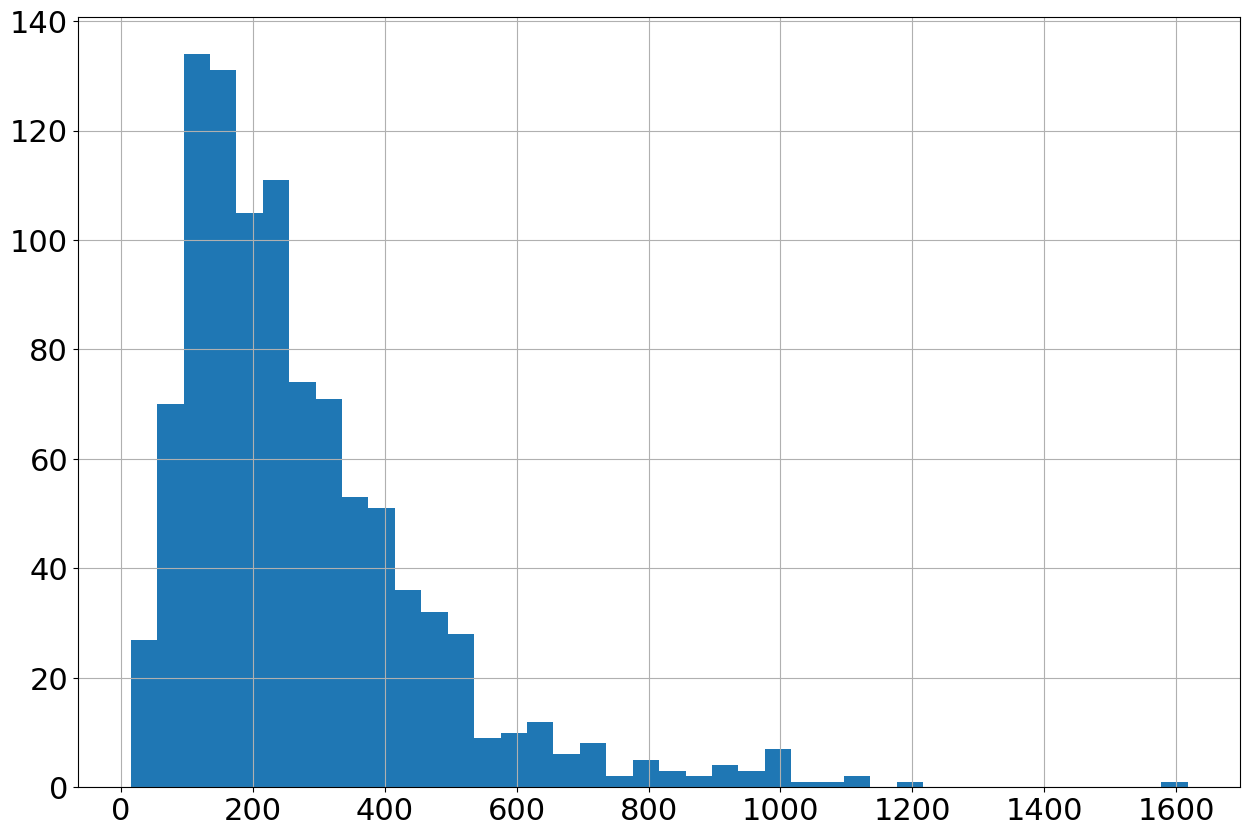

In [ ]:
df['text'].apply(lambda x: len(x.split())).hist(figsize=(15, 10), bins=40)

In [ ]:
labels2num = {
    'Good': 0,
    'Bad': 1,
    'Neutral': 2,
}

num2labels = {
    0: 'Good',
    1: 'Bad',
    2: 'Neutral',
}

In [ ]:
df['labels'] = df['labels'].map(labels2num)

In [ ]:
df

text  labels
30000  \n–ü–∞—Ü–∏–µ–Ω—Ç: –∫–∏–Ω–æ—Ç—Ä–∏–ª–æ–≥–∏—è –ü–∏—Ä–∞—Ç—ã –ö–∞—Ä–∏–±—Å–∫–æ–≥–æ –ú–æ—Ä—è...       0
30001  \n–î–∞–≤–Ω–æ —è¬†–Ω–µ –ø–µ—Ä–µ—Å–º–∞—Ç—Ä–∏–≤–∞–ª–∞ –ü–∏—Ä–∞—Ç–æ–≤ –ö–∞—Ä–∏–±—Å–∫–æ–≥–æ...       0
30002  \n–¢—Ä–µ—Ç—å—è —á–∞—Å—Ç—å –Ω–∞–º–Ω–æ–≥–æ —É—Å—Ç—É–ø–∞–µ—Ç –ø–µ—Ä–≤—ã–º –¥–≤—É—Ö. –•...       0
30003  \n–ë–ª–∞–≥–æ–¥–∞—Ä—è —Ç–∞–∫–∏–º –±–ª–æ–∫–±–∞—Å—Ç–µ—Ä–∞–º, –∫–∞–∫¬†¬´–ü–∏—Ä–∞—Ç—ã –ö–∞...       0
30004  \n-–≠—Ç–æ –±–µ–∑—É–º–∏–µ! -–≠—Ç–æ –ø–æ–ª–∏—Ç–∏–∫–∞!(—Å)\n\n–ù–∞–≤–µ—Ä–Ω–æ–µ,...       0
...                                                  ...     ...
30995  \n      –ó–¥–µ—Å—å –≤—Å–µ, –∫–∞–∫¬†–≤ –¥–æ–±—Ä–æ–π –¥–µ—Ç—Å–∫–æ–π —Å–∫–∞–∑–∫–µ...       1
30996  \n      –õ—É—á—à–µ –±—ã¬†–ö–æ–Ω—á–∞–ª–æ–≤—Å–∫–∏–π —Å–Ω—è–ª —ç—Ç–æ¬†40 –ª–µ—Ç¬†...       1
30997  \n      –í –æ—Ç–ª–∏—á–∏–∏ –æ—Ç¬†–º–Ω–æ–≥–∏—Ö –∑–¥–µ—à–Ω–∏—Ö —Ä–µ—Ü–µ–Ω–∑–µ–Ω—Ç–æ...       0
30998  \n      ¬´–©–µ–ª–∫—É–Ω—á–∏–∫ –∏¬†–ö—Ä—ã—Å–∏–Ω—ã–π –∫–æ—Ä–æ–ª—å¬ª¬†‚Äî —ç—Ç–æ¬†—Ç–∞...       2
30999  \n      –í —Ü–µ–ª–æ–º, –¥—É–º–∞—é, —Ö–æ–¥–∏—Ç—å –Ω–µ¬†—Å—Ç–æ–∏—Ç¬†‚Äî –Ω–∏¬†—Å...       1

[1000 rows x 2 columns]

In [ ]:
# –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º –∏ —Ä–∞–±–∏–≤–∞–µ–º –Ω–∞ train test
df = df.sample(frac=1).reset_index(drop=True)
train = df[:int(len(df)*0.8)]
test =  df[int(len(df)*0.8):]

In [ ]:
len(train), len(test)

(800, 200)

In [ ]:
# –ø—Ä–æ–≤–µ—Ä—è–µ–º —á—Ç–æ –∫–æ–ª-–≤–æ –∫–ª–∞—Å—Å–æ–≤ –≤—Å–µ–≥–æ df == –∫–æ–ª-–≤—É –∫–ª–∞—Å—Å–æ–≤ train
print(len(train['labels'].value_counts()))
train

3


text  labels
0    \n¬´–î–µ–Ω—å –°—É—Ä–∫–∞¬ª, –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫¬†—Ç–∞–∫–æ–º—É —Ä—è–¥—É —Ñ–∏–ª—å–º–æ...       0
1    \n–û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Å—é–∂–µ—Ç, –ø—Ä–µ–≤–æ—Å—Ö–æ–¥–Ω–æ–µ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏–µ,...       0
2    \n–≠—Ç–æ –Ω–µ¬†–ø—Ä–æ—Å—Ç–æ –º—É–ª—å—Ç—Ñ–∏–ª—å–º, –¥—Ä—É–∑—å—è –º–æ–∏. –≠—Ç–æ¬†—à–µ...       0
3    \n      –°—é–∂–µ—Ç: –ü—Ä–æ—à–ª–æ —Ä–æ–≤–Ω–æ —Å—Ç–æ¬†–ª–µ—Ç –ø–æ—Å–ª–µ —Ç–æ–π¬†...       1
4    \n      –ü—Ä–µ–¥—ã—Å—Ç–æ—Ä–∏—è\n\n\n\n–í 2007 –≥.¬†—è¬†—É–∑–Ω–∞–ª —Å...       1
..                                                 ...     ...
795  \n–≠—Ç–æ—Ç —Ñ–∏–ª—å–º —è¬†–ø–µ—Ä–µ—Å–º–∞—Ç—Ä–∏–≤–∞–ª –º–Ω–æ–≥–æ —Ä–∞–∑, –≤–ø–µ—Ä–≤—ã...       2
796  \n      –•–æ—á—É —Å—Ä–∞–∑—É –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏—Ç—å, —á—Ç–æ¬†–≤—Å–µ, —á—Ç–æ¬†...       2
797  \n–ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞¬†—Ç–æ, —á—Ç–æ¬†—è –Ω–µ¬†–ª—é–±–ª—é –ß–µ—Ä–Ω—É—é –ñ–µ–º—á—É–∂...       2
798  \n–ù–∏–∫–æ–≥–¥–∞ –Ω–µ¬†–±—ã–ª–∞ —Å—Ç—Ä–∞—Å—Ç–Ω—ã–º –ø–æ–∫–ª–æ–Ω–Ω–∏–∫–æ–º –∞–Ω–∏–º–µ....       0
799  \n–¢—Ä–µ—Ç–∏–π —Ñ–∏–ª—å–º –ø–∏—Ä–∞—Ç—Å–∫–æ–π —Å–∞–≥–∏‚Ä¶ –ü–æ–π–¥–µ–º –ø–æ¬†–ø–æ—Ä—è–¥...       0

[800 rows x 2 columns]

In [ ]:
# –ø—Ä–æ–≤–µ—Ä—è–µ–º —á—Ç–æ –∫–æ–ª-–≤–æ –∫–ª–∞—Å—Å–æ–≤ –≤—Å–µ–≥–æ df == –∫–æ–ª-–≤—É –∫–ª–∞—Å—Å–æ–≤ test
print(len(test['labels'].value_counts()))

3


In [ ]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

## –°–∫–∞—á–∏–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [ ]:
model_name = "sberbank-ai/sbert_large_nlu_ru"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sberbank-ai/sbert_large_nlu_ru and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
names = list(model.named_parameters())
names[:6]

[('bert.embeddings.word_embeddings.weight',
  Parameter containing:
  tensor([[ 0.0606, -0.0615,  0.0168,  ..., -0.0138, -0.0484, -0.0585],
          [ 0.0038, -0.0852,  0.0023,  ..., -0.0053,  0.0156, -0.0284],
          [ 0.0240, -0.0408, -0.0073,  ..., -0.0014,  0.0304,  0.0227],
          ...,
          [ 0.0440, -0.0153,  0.0383,  ..., -0.0643, -0.0344, -0.0135],
          [ 0.0465, -0.0162,  0.0522,  ..., -0.0459,  0.0222, -0.0480],
          [ 0.0326,  0.0194,  0.0508,  ...,  0.0417, -0.0545, -0.0163]],
         requires_grad=True)),
 ('bert.embeddings.position_embeddings.weight',
  Parameter containing:
  tensor([[ 3.9556e-04,  1.1412e-02, -7.9491e-03,  ..., -2.6713e-04,
           -3.0242e-03, -1.2221e-02],
          [-4.3789e-03,  8.2686e-03,  7.2317e-03,  ...,  5.0034e-03,
            2.9022e-03,  1.4276e-03],
          [ 5.3956e-03,  2.1844e-02,  1.8691e-02,  ..., -1.1598e-03,
           -3.7614e-03, -3.7767e-05],
          ...,
          [-4.0377e-03, -8.1262e-03, -1.7772e

In [ ]:
torch.cuda.empty_cache()
import gc
gc.collect()

46

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
device

device(type='cuda')

In [ ]:
dataset = load_dataset('csv', data_files={'train': 'train.csv', 'test': 'test.csv'})

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset = dataset.map(lambda e: tokenizer(e['text'], truncation = True, max_length=511, padding='max_length'), batched=True)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

BERT'—É –Ω—É–∂–Ω–æ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏—Ç—å —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.


- **input ids**: –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å —á–∏—Å–µ–ª, –æ—Ç–æ–∂–¥–µ—Å—Ç–≤–ª—è—é—â–∏—Ö –∫–∞–∂–¥—ã–π —Ç–æ–∫–µ–Ω —Å –µ–≥–æ –Ω–æ–º–µ—Ä–æ–º –≤ —Å–ª–æ–≤–∞—Ä–µ.
- **labels**: –≤–µ–∫—Ç–æ—Ä –∏–∑ –Ω—É–ª–µ–π, –µ–¥–∏–Ω–∏—Ü –∏ –¥–≤–æ–µ–∫. –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –Ω—É–ª–∏ –æ–±–æ–∑–Ω–∞—á–∞—é—Ç –ø–æ–∑–∏—Ç–∏–≤–Ω—É—é —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—É—é –æ–∫—Ä–∞—Å–∫—É, –µ–¥–∏–Ω–∏—Ü—ã - –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—É—é, –¥–≤–æ–π–∫–∏ - –Ω–µ–≥–∞—Ç–∏–≤–Ω—É—é.
- **attention mask**: (–Ω–µ–æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ) –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –Ω—É–ª–µ–π –∏ –µ–¥–∏–Ω–∏—Ü, –≥–¥–µ –µ–¥–∏–Ω–∏—Ü—ã –æ–±–æ–∑–Ω–∞—á–∞—é—Ç —Ç–æ–∫–µ–Ω—ã –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è, –Ω—É–ª–∏ - –ø–∞–¥–¥–∏–Ω–≥.
- **token_type_ids** –£–∫–∞–∑—ã–≤–∞–µ—Ç —è–ª—è–µ—Ç—Å—è –ª–∏ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å ¬´–∫–æ–Ω—Ç–µ–∫—Å—Ç–æ–º¬ª, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–π –¥–ª—è –≤–æ–ø—Ä–æ—Å–∞ (–≤—Å–µ —Ç–æ–∫–µ–Ω—ã 0) –∏–ª–∏ ¬´–≤–æ–ø—Ä–æ—Å–æ–º—É¬ª (–≤—Å–µ —Ç–æ–∫–µ–Ω—ã 1).

In [ ]:
# —ç—Ç–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –¥–ª—è —Ñ–æ—Ä–º–∞—Ç–∞ –ø–∞–π—Ç–æ—Ä—á–∞, –≤—Å–µ –∫—Ä–æ–º–µ –Ω–∏—Ö —É–±–∏—Ä–∞–µ–º
pytorch_style_columns = ['input_ids', 'token_type_ids', 'attention_mask', 'labels']  #
# —É–±–∏—Ä–∞–µ–º –∏—Ö –∏–∑ –∑–∞–≥—Ä—É–∑—á–∏–∫–∞
dataset = dataset.remove_columns(list(set(list(dataset['train'].features.keys())) - set(pytorch_style_columns)))

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 800
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 200
    })
})

In [ ]:
dataset.set_format(type='torch', columns=pytorch_style_columns, device='cuda')


In [ ]:
train_dataloader = DataLoader(dataset['train'], shuffle=True, batch_size=3)
test_dataloader = DataLoader(dataset['test'], shuffle=False, batch_size=1)

In [ ]:
len(train_dataloader)

267

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-6)
num_epochs = 1
num_training_steps = num_epochs * len(train_dataloader)

lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=2000,
    num_training_steps=num_training_steps
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
next(iter(train_dataloader))

{'labels': tensor([0, 1, 0], device='cuda:0'),
 'input_ids': tensor([[  101,   118,  1721,  ...,     0,     0,     0],
         [  101,  1040,   119,  ...,     0,     0,     0],
         [  101,  6135,   119,  ...,  1090, 29104,   102]], device='cuda:0'),
 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 1, 1, 1]], device='cuda:0')}

In [ ]:
from tqdm.auto import tqdm
from collections import deque

best_f1 = 0.
avg_loss = deque([], maxlen=30)

# –ø—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –≤—Å–µ–º —ç–ø–æ—Ö–∞–º
for epoch in range(num_epochs):
    print(40*'-', '\nepoch', epoch+1)
    model.train()

    with tqdm(train_dataloader, unit="batch") as tepoch:
        for batch in tepoch:
            model.train()
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()
            avg_loss.append(loss.item())
            tepoch.set_postfix(loss=np.array(list(avg_loss)).mean())

    losses = []
    print('\nvalidating')
    f1 = load_metric('f1')
    acc = load_metric('accuracy')
    precision = load_metric('precision')
    recall = load_metric('recall')
    with torch.no_grad():
        model.eval()
        for batch in tqdm(test_dataloader):
            batch = {k: v.to(device) for k, v in batch.items()}
            with torch.no_grad():
                outputs = model(**batch)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            f1.add_batch(predictions=predictions, references=batch["labels"])
            acc.add_batch(predictions=predictions, references=batch["labels"])
            precision.add_batch(predictions=predictions, references=batch["labels"])
            recall.add_batch(predictions=predictions, references=batch["labels"])
        print('weighted summary:')
        print('Test acc:', acc.compute()['accuracy'])
        print('Test precision:', precision.compute(average = 'macro')['precision'])
        print('Test recall:', recall.compute(average = 'macro')['recall'])
        f1_weighted = f1.compute(average = 'macro')['f1']
        print('Test f1:', f1_weighted, '\n')
        if f1_weighted > best_f1:
            best_f1 = f1_weighted
            model.save_pretrained(f"best_model_f1_max={best_f1}_len=511")

    model.train()

---------------------------------------- 
epoch 1


  0%|          | 0/267 [00:00<?, ?batch/s]


validating


<ipython-input-33-8e58d9348a7d>:50: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  f1 = load_metric('f1')
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


  0%|          | 0/200 [00:00<?, ?it/s]

weighted summary:
Test acc: 0.615
Test precision: 0.38321608040201005
Test recall: 0.615
Test f1: 0.47219814241486074 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
true = []
preds = []

model.eval()
for batch in tqdm(test_dataloader):
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    true += batch["labels"].detach().cpu().numpy().tolist()
    preds += predictions.detach().cpu().numpy().tolist()

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
true = [num2labels[e] for e in true]
preds = [num2labels[e] for e in preds]
print(classification_report(true, preds))

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        41
        Good       0.62      0.99      0.76       124
     Neutral       0.00      0.00      0.00        35

    accuracy                           0.61       200
   macro avg       0.21      0.33      0.25       200
weighted avg       0.38      0.61      0.47       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
